1. Use pandas to get some insights into the data (10 marks)
2. Show some interesting visualization of the data (10 marks)
3. Manage data for training & testing (20)
4. Finding a better value of k (10)


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Use pandas to get some insights into the data

In [33]:
df = pd.read_csv(r"https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")
df.head(10)

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
5,6,1127.886,11,12,4,2,2,148000
6,7,1352.040,5,7,3,2,1,58000
7,8,757.854,5,14,1,0,1,48000
8,9,1152.792,10,12,3,2,2,45000
9,10,1423.200,4,5,4,2,2,65000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [52]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [51]:
df.isnull().sum() # there is no null value in this data

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [38]:
df.dtypes  # checking data types, all columns have number format, no need to change data type format

Unnamed: 0       int64
Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [39]:
df.drop('Unnamed: 0', axis=1, inplace=True) # dropped Unnamed column

In [40]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [90]:
df[df.duplicated()] # checking duplicated values.

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
159,1565.520,2,6,3,2,1,45000
202,1387.620,2,7,3,2,2,45000
424,1889.298,2,14,4,2,2,100000
166,1889.298,2,14,4,2,2,100000
79,914.406,2,4,2,2,1,37000
...,...,...,...,...,...,...,...
229,1700.724,13,21,2,2,2,55000
301,1700.724,13,21,2,2,2,55000
329,1423.200,13,21,2,2,2,55000
26,3664.740,19,19,3,2,3,200000


In [87]:
df.duplicated().sum() # checking number of duplicated values.

66

In [91]:
df.drop_duplicates(inplace=True)  # to drop duplicate values.

In [92]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
406,1067.400,1,6,3,2,2,35000
455,1391.178,1,7,1,3,3,50000
59,1362.714,1,7,3,2,2,43000
361,1739.862,1,25,3,1,1,65000
54,4643.190,1,6,5,4,4,180000


In [93]:
df['Bedroom'].unique() # checking unique values in 'Bedroom' column

array([3, 1, 5, 2, 4, 6, 7], dtype=int64)

In [94]:
df['Bedroom'].unique().sum() # number of unique values in 'Bedroom' column

28

In [95]:
df.sort_values(by=['Floor'], inplace=True) # Here i sorted values by floor

In [96]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
406,1067.400,1,6,3,2,2,35000
625,1245.300,1,14,3,2,2,55000
160,1487.244,1,7,3,2,3,68000
620,711.600,1,1,3,1,1,12000
622,3095.460,1,6,4,2,3,100000


In [97]:
df['Floor'].unique() # checking unique values in floor column

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22], dtype=int64)

In [98]:
df.shape  # checking shape of the data

(579, 7)

In [99]:
df.size #checking size of the data

4053

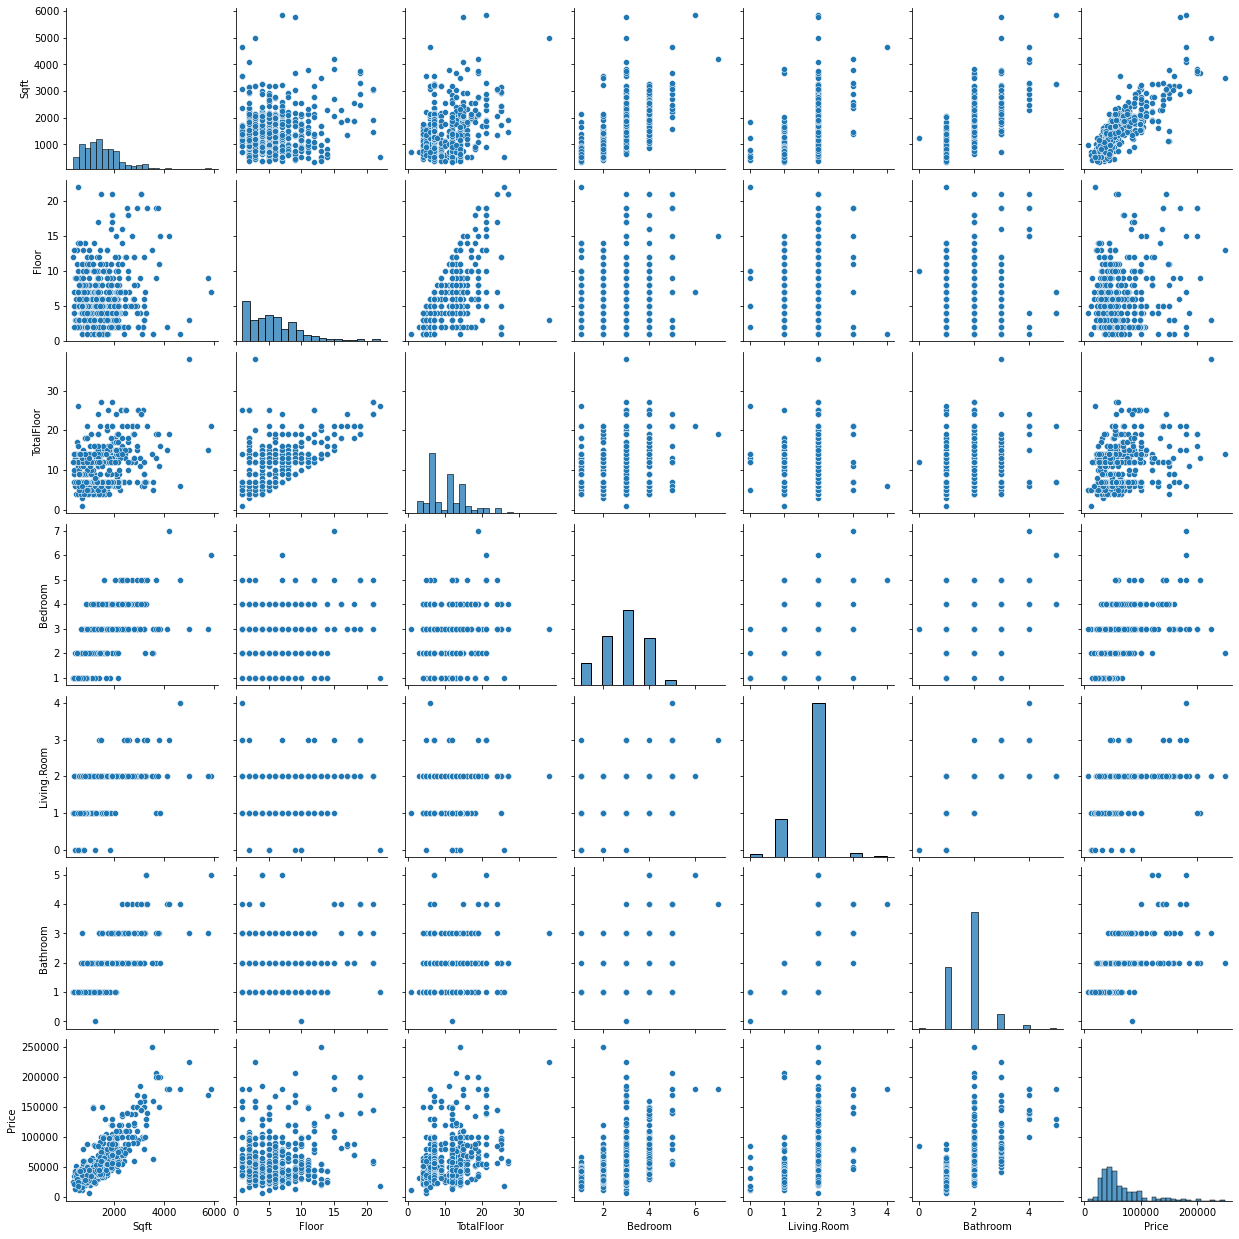

In [100]:
sns.pairplot(df) # here we can see all types of plot.

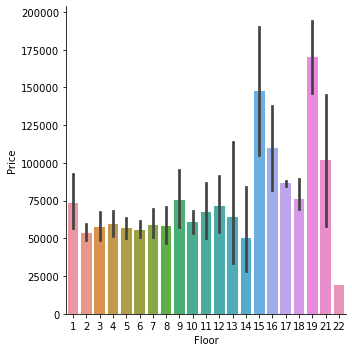

In [102]:
sns.catplot(x='Floor', y='Price',data=df, kind='bar') # here we can see price range of each floor.

<AxesSubplot:xlabel='Bedroom', ylabel='Floor'>

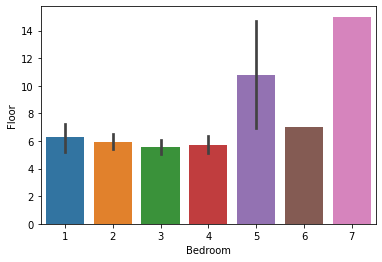

In [103]:
sns.barplot(x='Bedroom',y='Floor', data=df)  # here we can see number od bedrooms available in each floor.

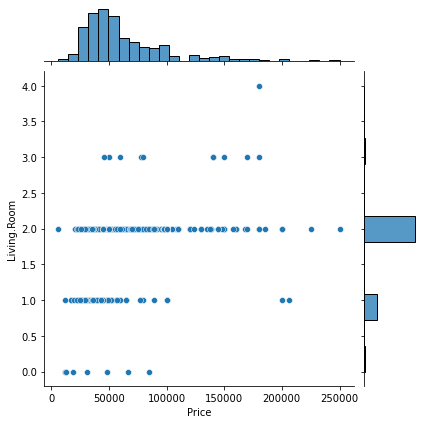

In [105]:
sns.jointplot(x='Price', y='Living.Room', data=df) # here we can see each living room price range and 
                                                   # what kind of living room has more numbers

In [84]:
df.corr() # here we are checking co-relation

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Sqft,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living.Room,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


<AxesSubplot:>

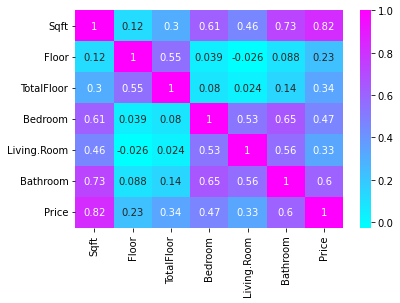

In [106]:
# heatmap

# it is used to see a co-relation.

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='cool')

- Before we build any machine learning model we should do both machine training and machine testing.
- Data should be splitted.
- Training ratio should be higher than Testing ratio.

In [107]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
406,1067.400,1,6,3,2,2,35000
625,1245.300,1,14,3,2,2,55000
160,1487.244,1,7,3,2,3,68000
620,711.600,1,1,3,1,1,12000
622,3095.460,1,6,4,2,3,100000


In [135]:
import sklearn
from sklearn.model_selection import train_test_split


In [114]:
x = df.drop('Price', axis=1).values  # independent variable
y = df['Price'].values               # dependent variable

In [118]:
x  # checking x values

array([[1.067400e+03, 1.000000e+00, 6.000000e+00, 3.000000e+00,
        2.000000e+00, 2.000000e+00],
       [1.245300e+03, 1.000000e+00, 1.400000e+01, 3.000000e+00,
        2.000000e+00, 2.000000e+00],
       [1.487244e+03, 1.000000e+00, 7.000000e+00, 3.000000e+00,
        2.000000e+00, 3.000000e+00],
       ...,
       [3.063438e+03, 2.100000e+01, 2.400000e+01, 5.000000e+00,
        2.000000e+00, 4.000000e+00],
       [1.458780e+03, 2.100000e+01, 2.700000e+01, 3.000000e+00,
        2.000000e+00, 2.000000e+00],
       [5.372580e+02, 2.200000e+01, 2.600000e+01, 1.000000e+00,
        0.000000e+00, 1.000000e+00]])

In [132]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = .20, random_state=1) 

# here training ratio is 80% and testing ratio is 20%

In [133]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)   

KNeighborsClassifier()

In [134]:
knn.score(x_test, y_test)

0.0603448275862069

In [150]:
x.shape  # it has 100% of data

(579, 6)

In [137]:
x_train.shape # it has 80% of data

(463, 6)

In [138]:
y_train.shape   

(463,)

In [141]:
x_test.shape  # it has 20% of data

(116, 6)

In [142]:
y_test.shape

(116,)

In [143]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import ceil, sqrt

In [144]:
knr = KNeighborsRegressor()
knr.fit(x_train, y_train)

KNeighborsRegressor()

In [145]:
y_pred = knr.predict(x_test)

In [146]:
sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

15549.025663287915

In [148]:
c = ceil(sqrt(df.shape[0]))
c

25

In [149]:
for i in range(0, c+1):
    model = KNeighborsRegressor()
    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, y_test_pred))
    print(i , error)

0 15549.025663287915
1 15549.025663287915
2 15549.025663287915
3 15549.025663287915
4 15549.025663287915
5 15549.025663287915
6 15549.025663287915
7 15549.025663287915
8 15549.025663287915
9 15549.025663287915
10 15549.025663287915
11 15549.025663287915
12 15549.025663287915
13 15549.025663287915
14 15549.025663287915
15 15549.025663287915
16 15549.025663287915
17 15549.025663287915
18 15549.025663287915
19 15549.025663287915
20 15549.025663287915
21 15549.025663287915
22 15549.025663287915
23 15549.025663287915
24 15549.025663287915
25 15549.025663287915
